# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | thaton
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | majengo
Processing Record 6 of Set 1 | bogatyye saby
Processing Record 7 of Set 1 | raudeberg
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | crab hill
City not found. Skipping...
Processing Record 10 of Set 1 | lakefield
Processing Record 11 of Set 1 | son la
Processing Record 12 of Set 1 | marienburg
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | port shepstone
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | tatawin
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | kosh-agach
Processing Record 21 of Set 1 | hohhot
Processing Record 22 of Set 1 | port lincoln


Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | fecamp
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | santa rosalia
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | cape town
Processing Record 45 of Set 4 | antipolo
Processing Record 46 of Set 4 | tabou
Processing Record 47 of Set 4 | puerto escondido
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | vestmanna
Processing Record 0 of Set 5 | trelew
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | jatai
Processing Record 3 of Set 5 | duma
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | grand gaube
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | kautokeino
Processing Record 8 of Set 5 | provideniya
Processing Record 9 of Set 5 | ahipara
Processing Record 10 of Set 5 | blagoyevo
Processing Record 11 of Set 5 | los llanos de arid

Processing Record 26 of Set 8 | touros
Processing Record 27 of Set 8 | isagarh
Processing Record 28 of Set 8 | puerto lempira
Processing Record 29 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 8 | krasnoselkup
Processing Record 31 of Set 8 | chala
Processing Record 32 of Set 8 | cap malheureux
Processing Record 33 of Set 8 | iskateley
Processing Record 34 of Set 8 | yenagoa
Processing Record 35 of Set 8 | te anau
Processing Record 36 of Set 8 | bubaque
Processing Record 37 of Set 8 | tarancon
Processing Record 38 of Set 8 | plouzane
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | prince george
Processing Record 42 of Set 8 | kaitangata
Processing Record 43 of Set 8 | sao joao da barra
Processing Record 44 of Set 8 | kalomo
City not found. Skipping...
Processing Record 45 of Set 8 | merrill
Processing Record 46 of Set 8 | saint anthony
Processing Record 47 of Set 8 | hambantota
Processing R

Processing Record 15 of Set 12 | bambanglipuro
Processing Record 16 of Set 12 | katsuura
Processing Record 17 of Set 12 | cabatuan
Processing Record 18 of Set 12 | rorvik
Processing Record 19 of Set 12 | vuktyl
Processing Record 20 of Set 12 | ust-tsilma
Processing Record 21 of Set 12 | nosy varika
Processing Record 22 of Set 12 | samusu
City not found. Skipping...
Processing Record 23 of Set 12 | de aar
Processing Record 24 of Set 12 | belmonte
Processing Record 25 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 26 of Set 12 | slavgorod
Processing Record 27 of Set 12 | leo
Processing Record 28 of Set 12 | keshorai patan
Processing Record 29 of Set 12 | ushumun
Processing Record 30 of Set 12 | musoma
Processing Record 31 of Set 12 | hualmay
Processing Record 32 of Set 12 | sorland
Processing Record 33 of Set 12 | kokkola
Processing Record 34 of Set 12 | thompson
Processing Record 35 of Set 12 | oksfjord
Processing Record 36 of Set 12 | maningrida
Processing Record 3

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,28.08,87,60,1.79,EC,1680995483
1,atuona,-9.8000,-139.0333,27.14,69,0,5.55,PF,1680995406
2,thaton,16.9206,97.3714,26.29,80,94,1.40,MM,1680995483
3,dikson,73.5069,80.5464,-32.98,99,34,2.21,RU,1680995483
4,majengo,-5.1500,38.9833,24.28,91,13,1.75,TZ,1680995354


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.08,87,60,1.79,EC,1680995483
1,atuona,-9.8000,-139.0333,27.14,69,0,5.55,PF,1680995406
2,thaton,16.9206,97.3714,26.29,80,94,1.40,MM,1680995483
3,dikson,73.5069,80.5464,-32.98,99,34,2.21,RU,1680995483
4,majengo,-5.1500,38.9833,24.28,91,13,1.75,TZ,1680995354


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

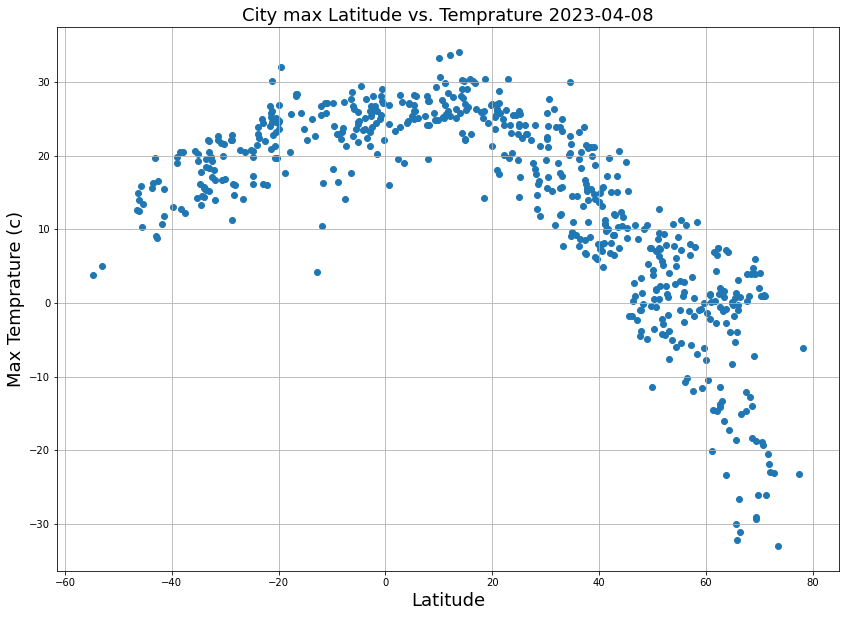

In [34]:
# Pull Date now
date = datetime.date(datetime.now())
# Build scatter plot for latitude vs. temperature
x= city_data_df["Lat"]
y= city_data_df["Max Temp"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude",size=18)
plt.ylabel("Max Temprature (c)",size=18)
plt.title(f"City max Latitude vs. Temprature {date}",size=18)

# # Show plot
plt.show()

#### Latitude Vs. Humidity

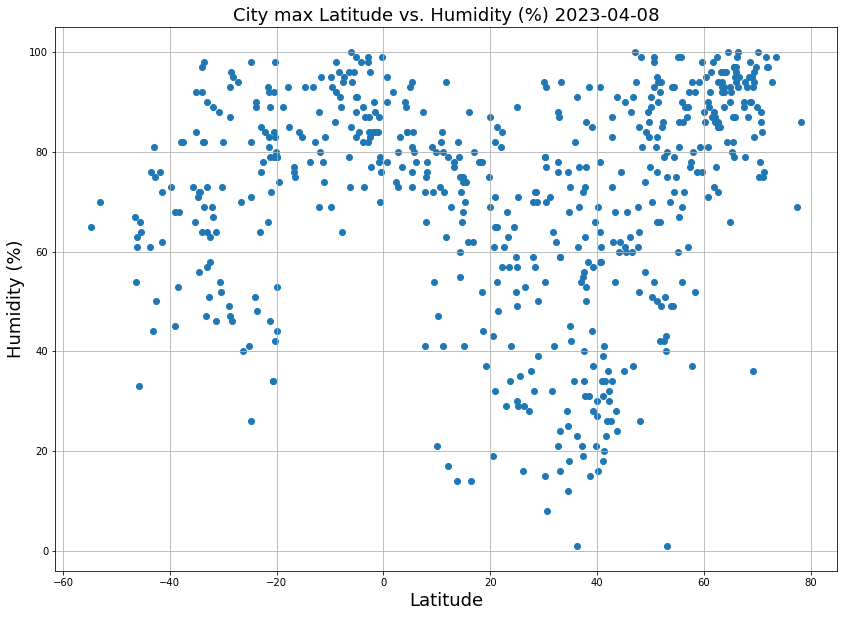

In [33]:
# Pull Date now
date = datetime.date(datetime.now())
# Build the scatter plots for latitude vs. humidity
x= city_data_df["Lat"]
y= city_data_df["Humidity"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude",size=18)
plt.ylabel("Humidity (%)",size=18)
plt.title(f"City max Latitude vs. Humidity (%) {date}",size=18)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

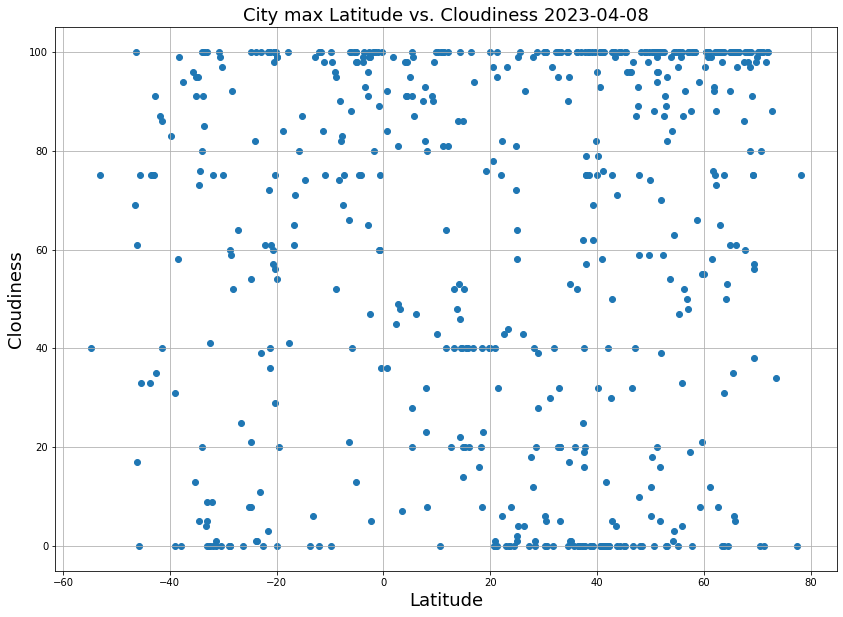

In [32]:
# Pull Date now
date = datetime.date(datetime.now())
# Build the scatter plots for latitude vs. cloudiness
x= city_data_df["Lat"]
y= city_data_df["Cloudiness"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude",size=18)
plt.ylabel("Cloudiness",size=18)
plt.title(f"City max Latitude vs. Cloudiness {date}",size=18)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

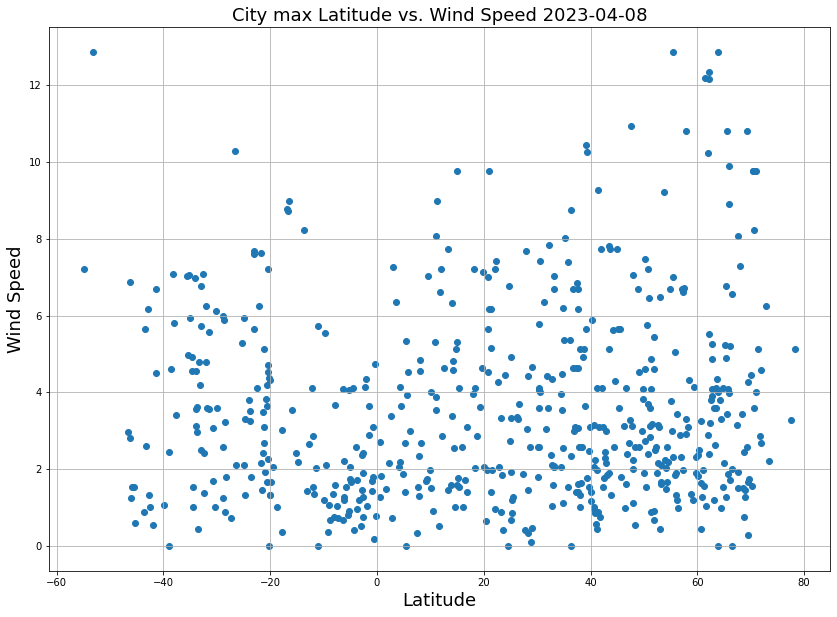

In [31]:
# Pull Date now
date = datetime.date(datetime.now())
# Build the scatter plots for latitude vs. wind speed
x= city_data_df["Lat"]
y= city_data_df["Wind Speed"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude",size=18)
plt.ylabel("Wind Speed",size=18)
plt.title(f"City max Latitude vs. Wind Speed {date}",size=18)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def lnr_fn(x_values, y_values,x_ann,y_ann):
    plt.figure(figsize=(14,10))
    plt.scatter(x_values,y_values)
    plt.xlabel(xlabel,size=18)
    plt.ylabel(ylabel,size=18)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    
    plt.plot(x_values,regress_values,"r-")
    
    print(f"The rvalue is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")
    print(f"The Slope is: {slope}\n"
          f"The Intercept is: {intercept}\n"
          f"The pvalue is: {pvalue}\n"
          f"The Std. Dev. is: {stderr}"
         )
   
    plt.show()    

In [14]:
#city_data_df.head()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thaton,16.9206,97.3714,26.29,80,94,1.40,MM,1680995483
3,dikson,73.5069,80.5464,-32.98,99,34,2.21,RU,1680995483
5,bogatyye saby,56.0102,50.4483,1.51,54,33,1.34,RU,1680995484
6,raudeberg,61.9875,5.1352,4.37,73,93,2.89,NO,1680995485
8,lakefield,43.6775,-95.1717,20.66,24,0,7.72,US,1680995485


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.08,87,60,1.79,EC,1680995483
1,atuona,-9.8000,-139.0333,27.14,69,0,5.55,PF,1680995406
4,majengo,-5.1500,38.9833,24.28,91,13,1.75,TZ,1680995354
7,busselton,-33.6500,115.3333,15.34,82,100,2.96,AU,1680995485
14,port shepstone,-30.7414,30.4550,21.66,88,100,3.08,ZA,1680995487


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.863873377627135
The r-squared is: 0.7462772125729146
The Slope is: -0.6259861253974728
The Intercept is: 35.43808071166475
The pvalue is: 8.689532453036023e-122
The Std. Dev. is: 0.01820460782454798


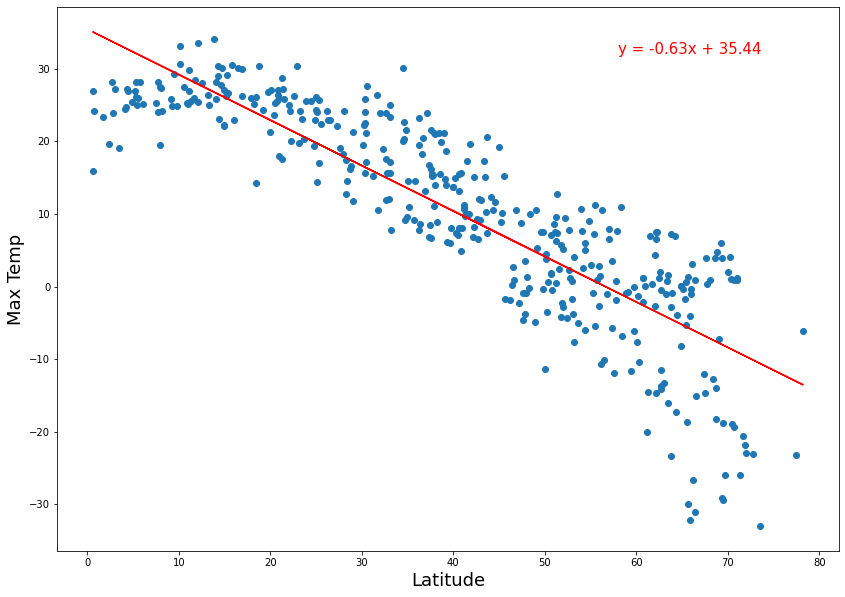

In [36]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
xlabel='Latitude'
ylabel='Max Temp'
lnr_fn(x_values, y_values,58,32)


The rvalue is: 0.686015674978612
The r-squared is: 0.4706175063163607
The Slope is: 0.2682587036978975
The Intercept is: 26.648716438215203
The pvalue is: 1.5439380092747114e-25
The Std. Dev. is: 0.0216940355107866


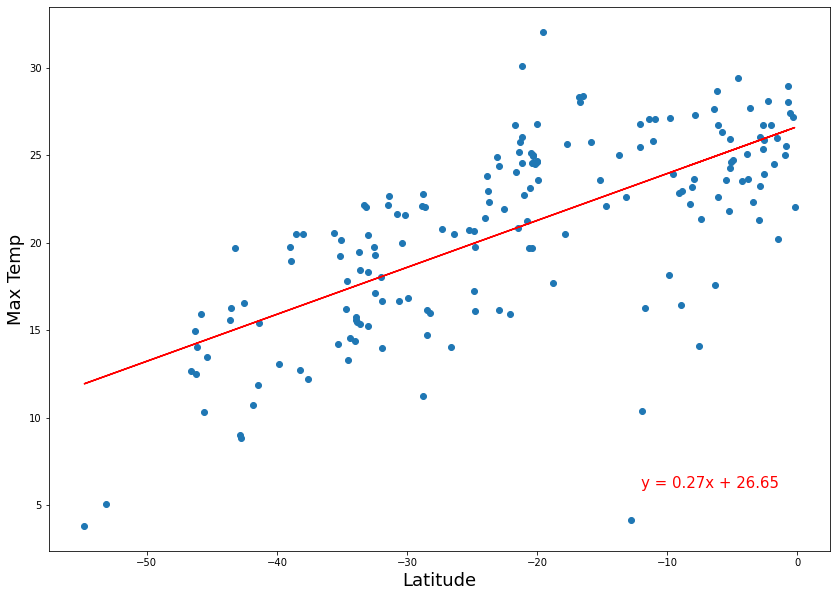

In [37]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
xlabel='Latitude'
ylabel='Max Temp'
lnr_fn(x_values, y_values,-12,6)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

1) Northern Hemisphere: the Latitude vs Maximum Tempreture relationship is negative with -0.63 Slope & 35.44 Intercept but moderate standard deviation 0.018 which mean accuracy is not that perfect.

2) Southern Hemisphere: the Latitude vs Maximum Tempreture relationship is positve with 0.27 Slope & 26.65 Intercept but moderate standard deviation 0.022 which mean accuracy is not that perfect.

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.30674733380737323
The r-squared is: 0.09409392679793206
The Slope is: 0.3681252115242296
The Intercept is: 53.60912034456168
The pvalue is: 2.997060555636225e-10
The Std. Dev. is: 0.05696962019584966


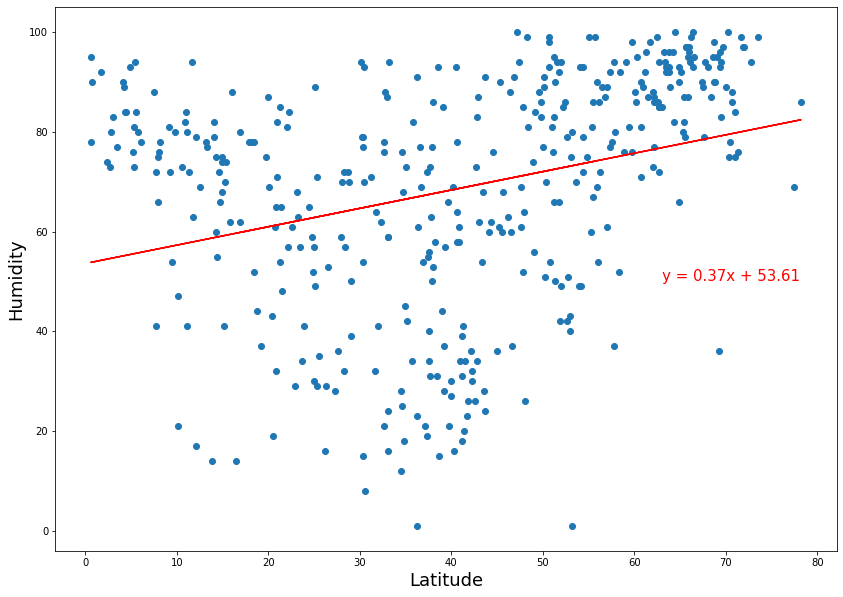

In [38]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
xlabel='Latitude'
ylabel='Humidity'
lnr_fn(x_values, y_values,63,50)

The rvalue is: 0.4690641717144984
The r-squared is: 0.2200211971862084
The Slope is: 0.5619949016968702
The Intercept is: 88.38393455594316
The pvalue is: 6.652596170626063e-11
The Std. Dev. is: 0.08068211804599486


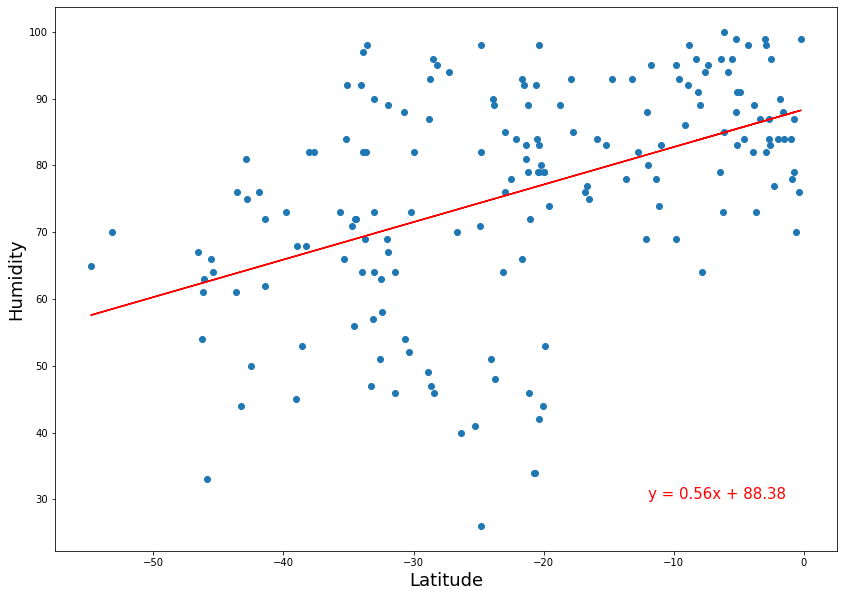

In [39]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
xlabel='Latitude'
ylabel='Humidity'
lnr_fn(x_values, y_values,-12,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

1) Northern Hemisphere: the Latitude vs Humidity relationship is positve with 0.37 Slope & 53.61 Intercept but moderate standard deviation 0.057 which mean accuracy is not good.
    
2) Southern Hemisphere: the Latitude vs Humidity relationship is positve with 0.56 Slope & 88.38 Intercept but moderate standard deviation 0.081 which mean accuracy is not good.

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.1779115934708284
The r-squared is: 0.031652535091329315
The Slope is: 0.35243987866443377
The Intercept is: 46.621160403346316
The pvalue is: 0.00032612985121440157
The Std. Dev. is: 0.09722621453812318


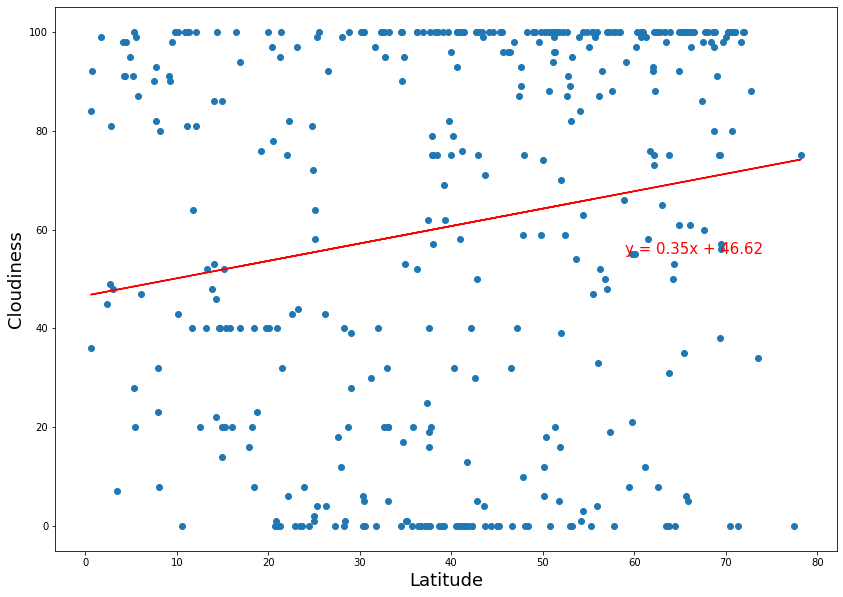

In [40]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
xlabel='Latitude'
ylabel='Cloudiness'
lnr_fn(x_values, y_values,59,55)

The rvalue is: 0.27416534892656147
The r-squared is: 0.0751666385520232
The Slope is: 0.7294345170192772
The Intercept is: 78.8974856630046
The pvalue is: 0.0002514078520942167
The Std. Dev. is: 0.19509281095678369


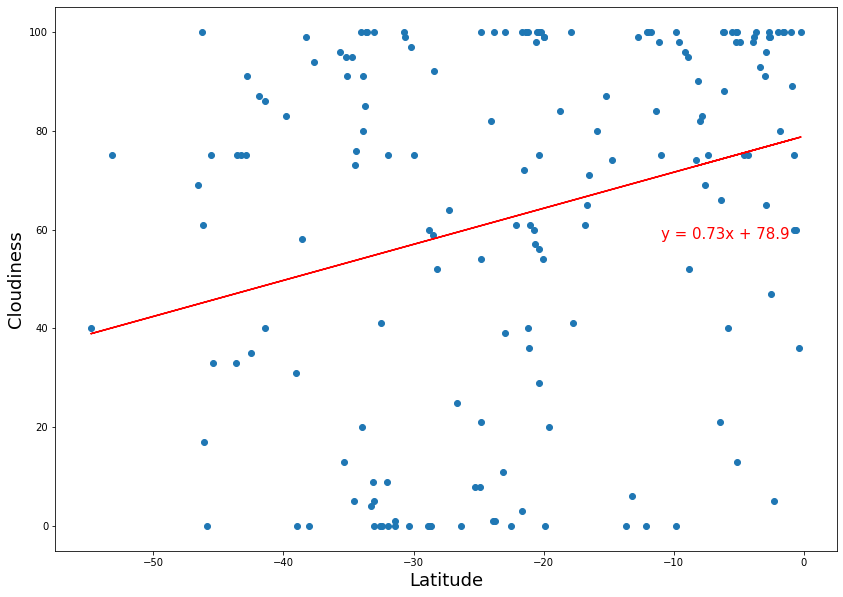

In [41]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
xlabel='Latitude'
ylabel='Cloudiness'
lnr_fn(x_values, y_values,-11,58)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

1) Northern Hemisphere: the Latitude vs Cloudiness relationship is negative with 0.35 Slope & 46.62 Intercept but moderate standard deviation 0.097 which mean accuracy is so bad.
    
2) Southern Hemisphere: the Latitude vs Cloudiness relationship is positve with 0.73 Slope & 78.9 Intercept but moderate standard deviation 0.20 which mean accuracy is so bad.

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.09290966166586635
The r-squared is: 0.008632205230865756
The Slope is: 0.012113102377971295
The Intercept is: 3.1908977056730192
The pvalue is: 0.06208165146365843
The Std. Dev. is: 0.006474390437312221


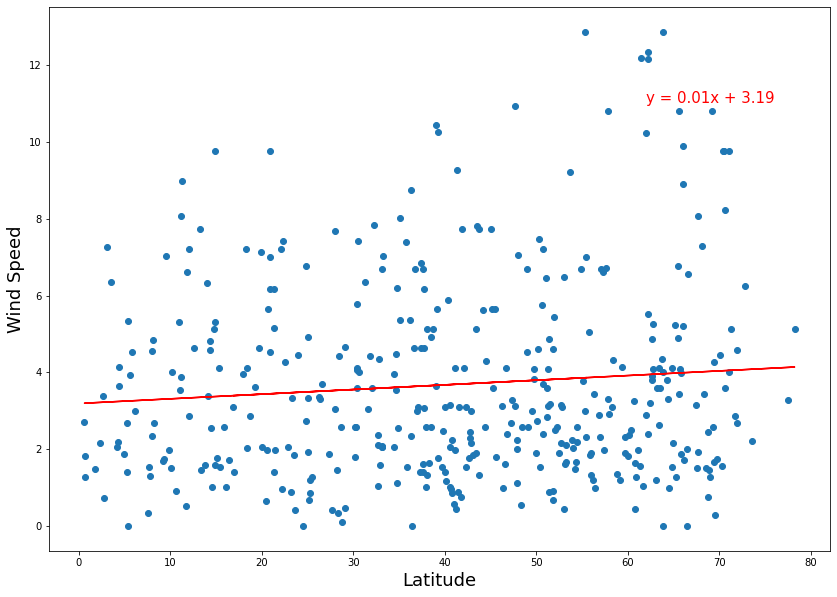

In [42]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]
xlabel='Latitude'
ylabel='Wind Speed'
lnr_fn(x_values, y_values,62,11)

The rvalue is: -0.322418817844771
The r-squared is: 0.10395389410041962
The Slope is: -0.05466499733243882
The Intercept is: 2.0547926361972975
The pvalue is: 1.4327624763295398e-05
The Std. Dev. is: 0.012237421104430338


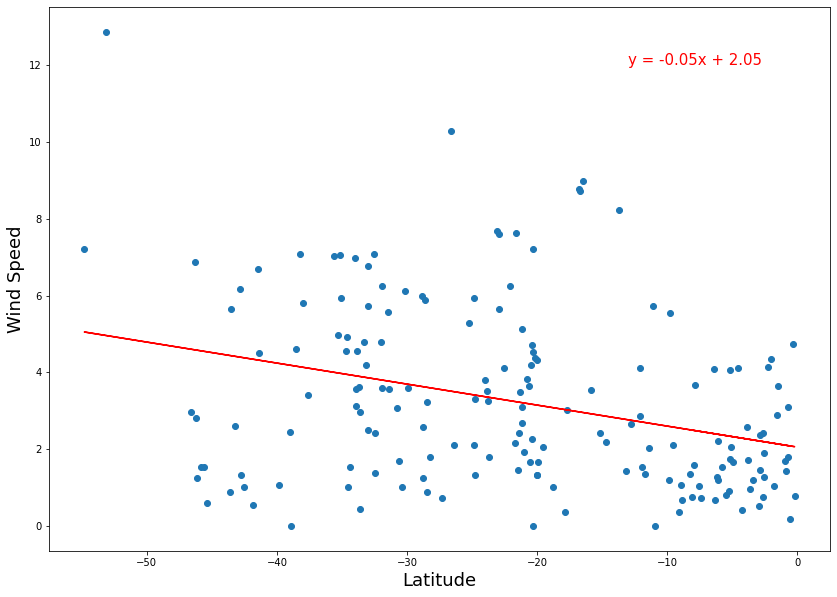

In [43]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
xlabel='Latitude'
ylabel='Wind Speed'
lnr_fn(x_values, y_values,-13,12)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

1) Northern Hemisphere: the Latitude vs Wind Speed relationship is pefrect horizontal with 0.01 Slope & 3.19 Intercept but moderate standard deviation 0.0064 which mean accuracy is so bad.

2) Southern Hemisphere: the Latitude vs Wind Speed relationship is negative with -0.05 Slope & 2.05 Intercept but moderate standard deviation 0.012 which mean accuracy is not that perfect.